In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial. distance import cdist
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms

In [2]:
np.random.seed(0)
l = 200
beta = 2.

x = np.linspace(-10,10,l)
w = np.array([1.,2.,3.,4.])
y = w[0]+w[1]*x+w[2]*np.sin(x)+w[3]*np.cos(x)+beta*np.random.randn(l)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

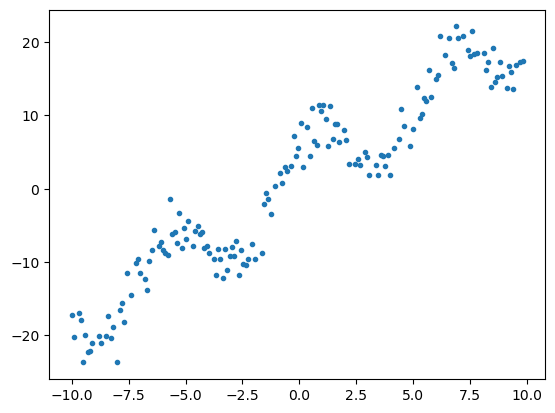

In [3]:
plt.plot(x_train,y_train,'.')

In [4]:
def map_feature(x):
    return np.vstack([np.ones_like(x),x,np.sin(x),np.cos(x)]).T

In [5]:
X_train = map_feature(x_train)
X_test = map_feature(x_test)

In [6]:
w_hat = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

In [7]:
w_hat

array([1.10039037, 1.9712099 , 2.58271397, 4.20427972])

In [8]:
def f(x,w):
    return w[0]*torch.sin(x*w[1])+w[2]*torch.sin(x*w[3])

In [10]:
torch.manual_seed(0)
w_hat = torch.randn(4)
w_hat.requires_grad=True
X_tr = torch.FloatTensor(x_train)
Y_tr = torch.FloatTensor(y_train)
loss_fn = torch.nn.MSELoss()
optim = torch.optim.SGD([w_hat], lr=0.01)

for i in tqdm(range(1,100000), leave=False):
    optim.zero_grad()
    loss = loss_fn(f(X_tr,w_hat),Y_tr)
    loss.backward()
    optim.step()

  0%|          | 0/99999 [00:00<?, ?it/s]

In [11]:
w_hat

tensor([ 1.1986, -1.9920, -0.9286,  2.5259], requires_grad=True)

In [12]:
loss_fn(f(X_tr,w_hat),Y_tr)

tensor(150.4481, grad_fn=<MseLossBackward0>)